# Predicting House Prices using Linear Regression and k-Nearest Neighbors (k-NN)

## Introduction
This project involves building and comparing two regression models to predict median house prices in California based on various socio-economic and geographical features. We'll explore:

* A parametric approach using Linear Regression
* A non-parametric approach using k-Nearest Neighbors Regression (k-NN)

By applying both models to the same dataset, we'll evaluate their effectiveness and understand the trade-offs between these approaches.

## Dataset Information
We'll be using the California Housing Dataset, containing 20,640 records with eight input features:
* Median income (MedInc)
* Housing age (HouseAge)
* Average number of rooms (AveRooms)
* Average number of bedrooms (AveBedrms)
* Population (Population)
* Average occupancy (AveOccup)
* Latitude (Latitude)
* Longitude (Longitude)

The target variable is the median house value (MedHouseValue).

## 1. Importing Required Libraries

We'll first import the necessary libraries for data manipulation, visualization, and machine learning models.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 2. Data Loading and Exploration

Next, we'll load the California Housing dataset and convert it to a pandas DataFrame for easier manipulation and analysis.

In [26]:
housing = fetch_california_housing()

housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['MedHouseValue'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Let's check the basic information about our dataset to understand its structure.

In [27]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Now let's examine the statistical summary of our dataset to understand the range and distribution of our features.

In [28]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 3. Data Visualization

Let's visualize the distribution of our target variable - median house value.

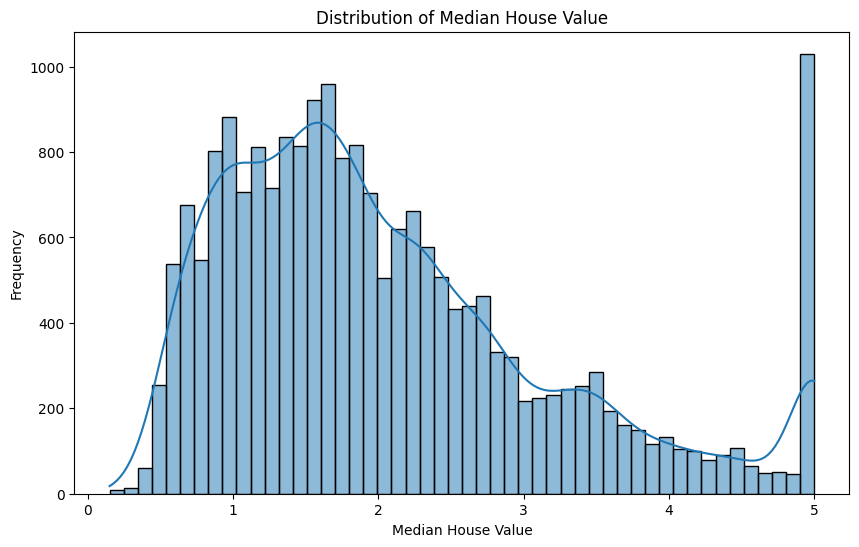

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['MedHouseValue'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

Lets build the correlation heatmap to see how strong the relation is with target.

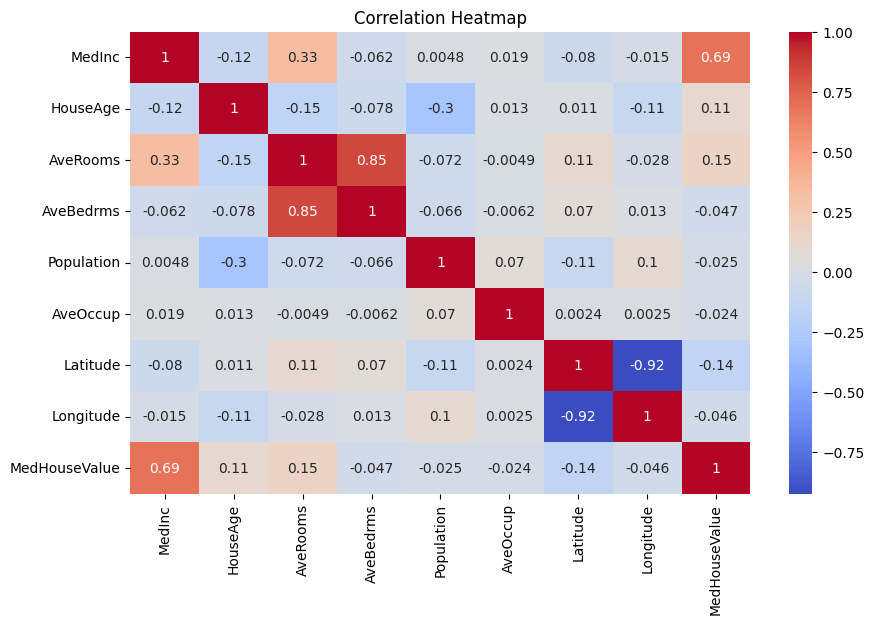

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Visualizing top 4 highly correlated features with target.

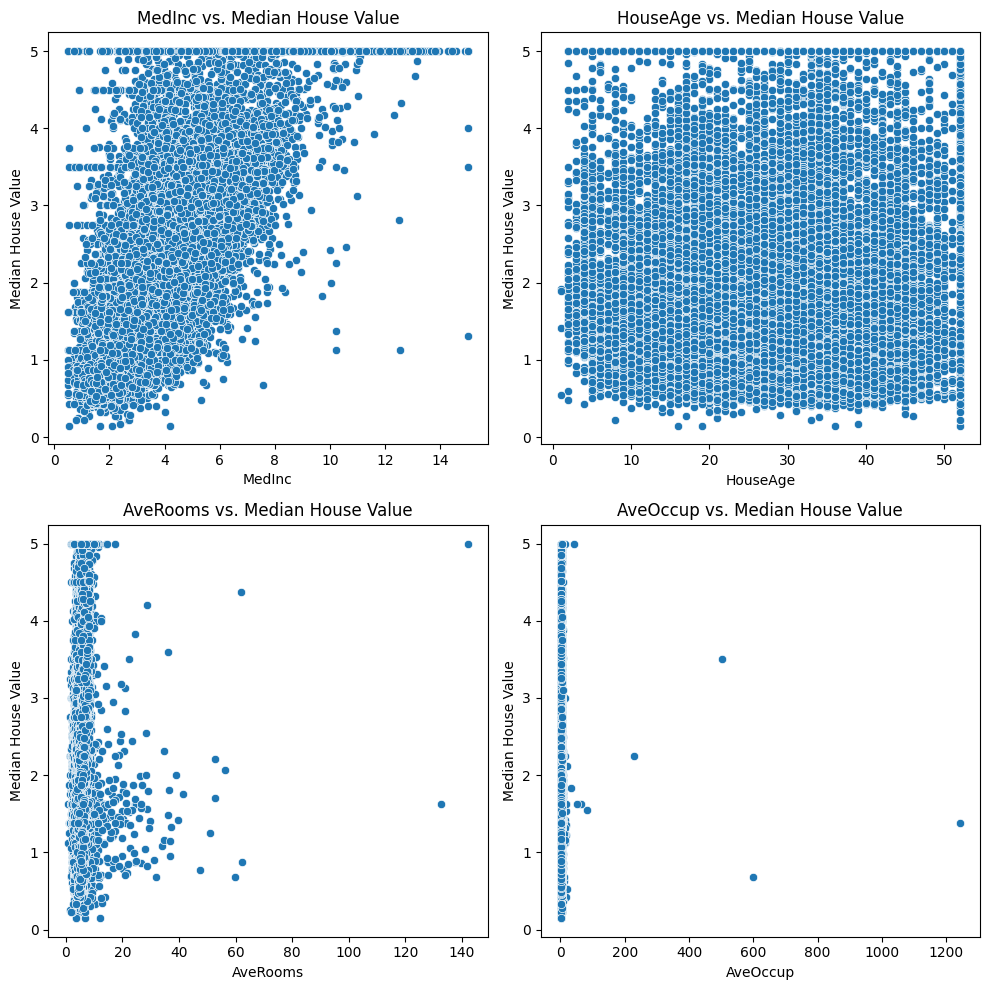

In [31]:
important_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, feature in enumerate(important_features):
    ax = plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=housing_df, x=feature, y='MedHouseValue')
    plt.title(f'{feature} vs. Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

## 4. Data Preparation

Now we'll split our dataset into training and testing sets (80% for training, 20% for testing) and scale the features to improve model performance.

In [32]:
X = housing_df.drop('MedHouseValue', axis=1)
y = housing_df['MedHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We'll use log (to handel with skewed data as in our case) and StandardScaler to standardize our features, which is especially important for k-NN which relies on distances between data points.

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We'll create a list to store the performance results of different models for later comparison.

In [34]:
results = []

## 5. Linear Regression Model

We'll start with the Linear Regression model, which assumes a linear relationship between the features and the target variable.

In [35]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

Now we'll evaluate the Linear Regression model using various metrics:

In [36]:
results.append({
    'Model': 'Linear Regression',
    'R^2 Score': r2_score(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})

Let's visualize how well our Linear Regression model's predictions match the actual values:

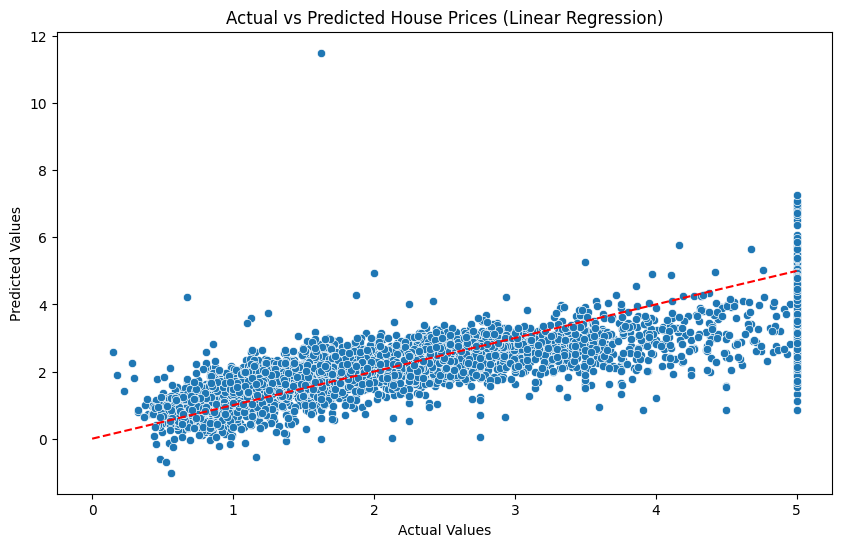

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[0, 5], y=[0, 5], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted House Prices (Linear Regression)')
plt.show()

### Feature Importance in Linear Regression

One advantage of Linear Regression is interpretability. Let's examine which features have the strongest influence on our predictions:

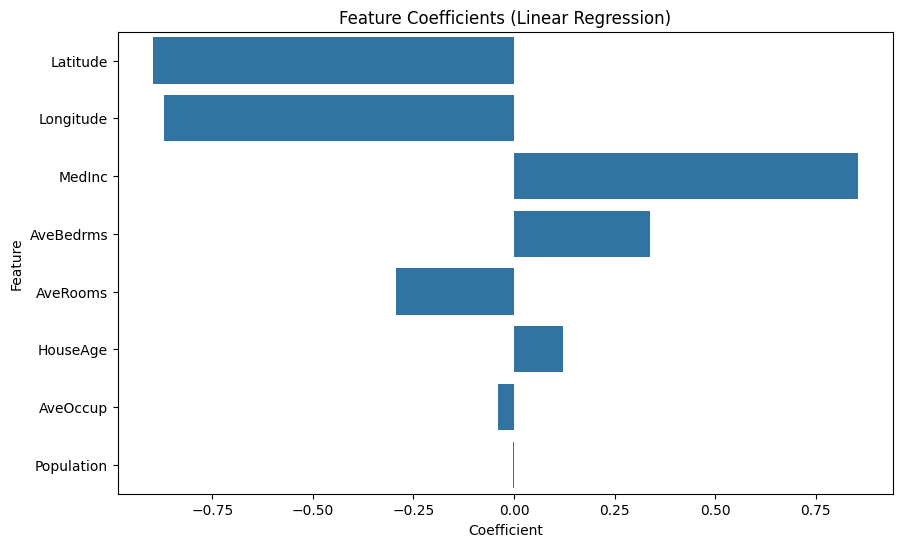

In [38]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg.coef_
})
feature_importance.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### Residual Analysis for Linear Regression

Examining the residuals (differences between predicted and actual values) helps us understand model performance:

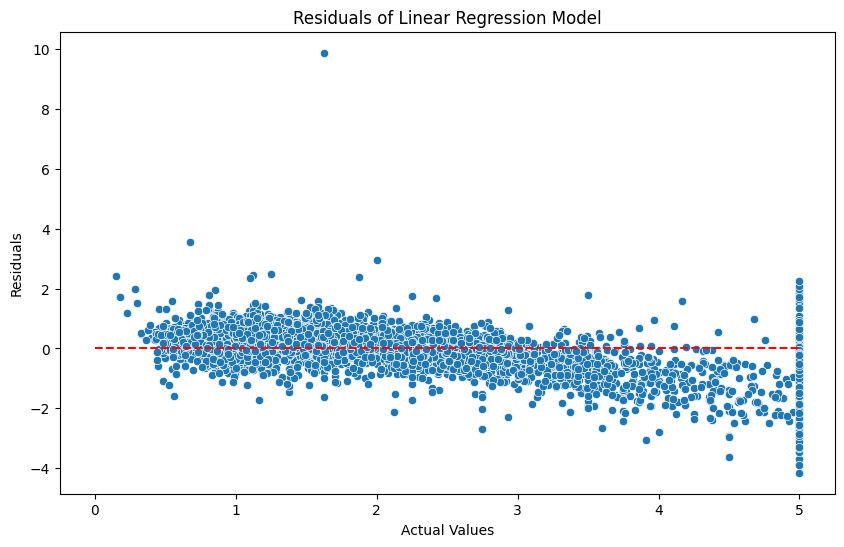

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred - y_test)
plt.hlines(y=0, xmin=0, xmax=5, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals of Linear Regression Model')
plt.show()

## 6. k-Nearest Neighbors (k-NN) Models

Now let's explore the non-parametric k-NN approach. First, we'll try different k values to find the optimal number of neighbors:

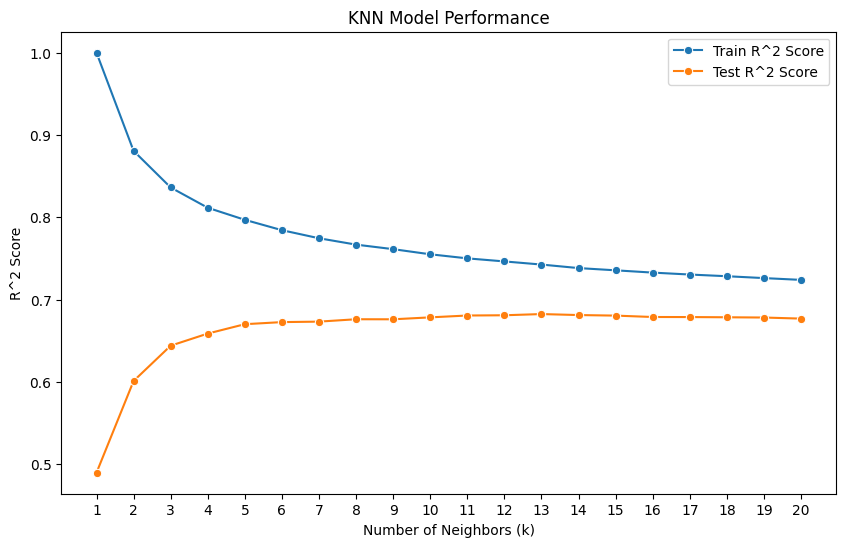

In [40]:
train_accucies = []
test_accucies = []

for k in range(1, 21):
    knreg = KNeighborsRegressor(n_neighbors=k)
    knreg.fit(X_train_scaled, y_train)
    y_train_pred = knreg.predict(X_train_scaled)
    y_test_pred = knreg.predict(X_test_scaled)
    train_accucies.append(r2_score(y_train, y_train_pred))
    test_accucies.append(r2_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=train_accucies, label='Train R^2 Score', marker='o')
sns.lineplot(x=range(1, 21), y=test_accucies, label='Test R^2 Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.title('KNN Model Performance')
plt.xticks(range(1, 21, 1))
plt.legend()
plt.show()

Based on the plot above, let's train k-NN models with selected k values (3, 5, 7, and 13):

In [41]:
k_values = [3, 5, 7, 13]
knreg_models = {}

for k in k_values:
    knreg = KNeighborsRegressor(n_neighbors=k)
    knreg.fit(X_train_scaled, y_train)
    knreg_models[k] = knreg

Now let's evaluate each k-NN model and add their performance metrics to our results list:

In [42]:
for k, model in knreg_models.items():
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Model': f'KNN (k={k})',
        'R^2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    })

## 7. Model Comparison and Evaluation

Let's compare the performance of all our models:

In [43]:
results_df = pd.DataFrame(results)
results_df

,Model,R^2 Score,MAE,MSE,RMSE
0,Linear Regression,0.575788,0.533200,0.555892,0.745581
1,KNN (k=3),0.643880,0.459920,0.466663,0.683128
2,KNN (k=5),0.670010,0.446154,0.432422,0.657588
3,KNN (k=7),0.673130,0.444039,0.428334,0.654472
4,KNN (k=13),0.682321,0.437303,0.416289,0.645205


Let's identify the best performing model based on R² score:

In [44]:
best_model = results_df.loc[results_df['R^2 Score'].idxmax()]
print(f"Best Model: {best_model['Model']}")

Best Model: KNN (k=13)


Let's take a closer look at the best k-NN model (k=13):

In [45]:
knreg = KNeighborsRegressor(n_neighbors=13)
knreg.fit(X_train_scaled, y_train)
y_pred = knreg.predict(X_test_scaled)

Let's visualize the predictions of our best k-NN model:

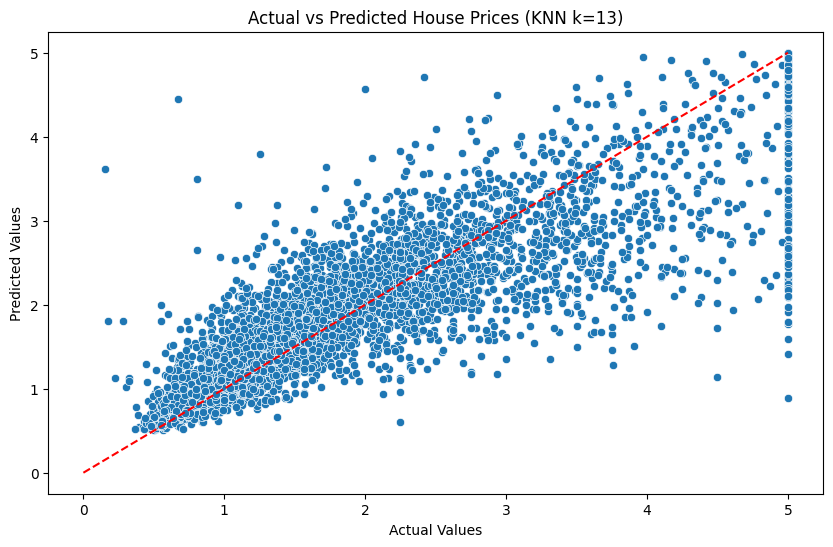

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=[0, 5], y=[0, 5], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted House Prices (KNN k=13)')
plt.show()

### Residual Analysis for k-NN

Let's examine the residuals for our best k-NN model:

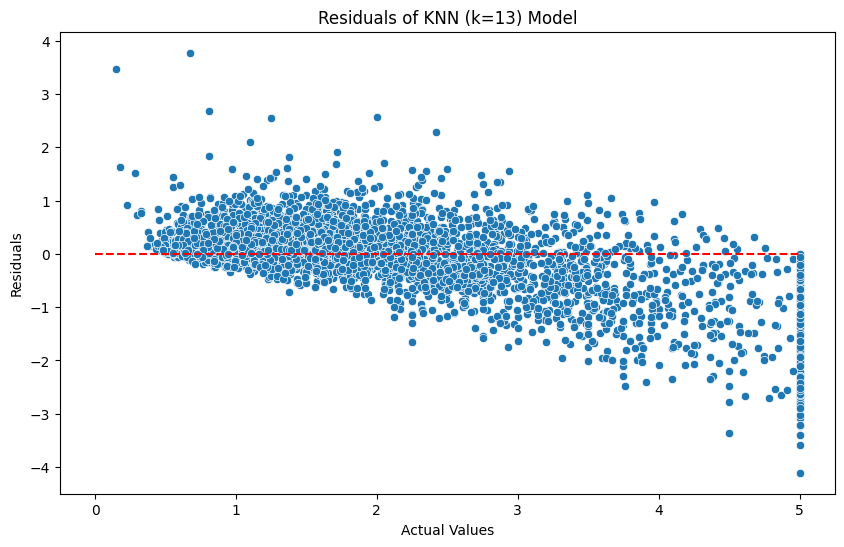

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred - y_test)
plt.hlines(y=0, xmin=0, xmax=5, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals of KNN (k=13) Model')
plt.show()

## 8. Comprehensive Analysis and Conclusion

### Summary of Findings

In this project, we built and compared two regression models for predicting California house prices:

1. **Linear Regression**: A parametric approach that assumes a linear relationship between features and target variable
2. **k-Nearest Neighbors (k-NN)**: A non-parametric approach that makes predictions based on similarity to neighboring data points

### Performance Comparison

Our analysis revealed several key insights:

- **Linear Regression** provides good overall performance with the benefit of interpretability through its coefficients
- **k-NN models** with different k values showed varying performance, with k=13 providing the best balance between bias and variance
- Both models struggle somewhat with very high house prices, as seen in the residual plots

### Feature Importance

From the Linear Regression coefficients, we observed that:

- **Median Income** has the strongest positive correlation with house prices
- **Geographic location** (latitude and longitude) significantly influences prices
- **Housing characteristics** like average rooms and bedrooms also play important roles

### Model Selection Trade-offs

When choosing between these models, consider:

1. **Linear Regression**:
   - Pros: Fast training, interpretable coefficients, good overall performance
   - Cons: Limited flexibility for capturing complex non-linear relationships

2. **k-NN Regression**:
   - Pros: Can capture non-linear patterns, no assumptions about data distribution
   - Cons: Computationally expensive for large datasets, sensitive to irrelevant features, requires feature scaling

### Recommendations

Based on our analysis:

1. For **interpretability and simplicity**, Linear Regression is a good choice
2. For potentially **capturing complex relationships**, k-NN with k=13 offers good performance
3. Further improvements could include:
   - Feature engineering (creating interaction terms, polynomial features)
   - Trying more advanced models (Random Forests, Gradient Boosting)
   - Addressing outliers visible in the residual plots

### Conclusion

This project demonstrated the application of both parametric and non-parametric regression techniques to a real-world housing price prediction problem. Both approaches have their strengths, and the choice between them depends on the specific requirements of the application, particularly the trade-off between interpretability and flexibility.